In [1]:
import os
import re
import cv2
import numpy as np
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt

In [2]:
img_path = os.listdir('lane/')

In [3]:
img = cv2.imread('lane/'+img_path[0]) 

In [4]:
np.shape(img)

(310, 554, 3)

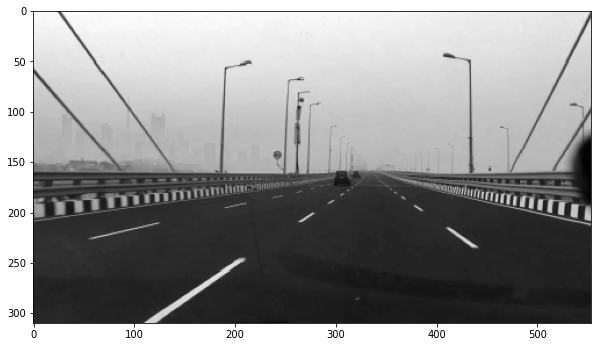

In [5]:
plt.figure(figsize=(10,10))
plt.imshow(img[:,:,0], cmap= "gray")
plt.show()

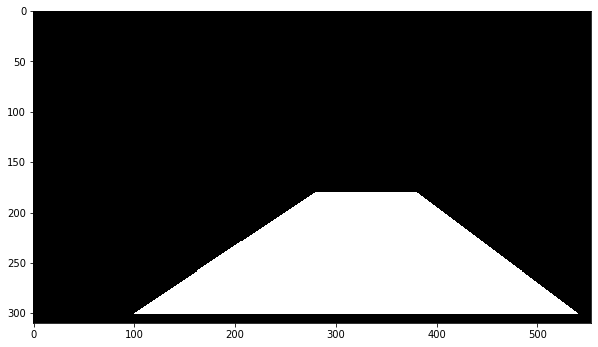

In [8]:
stencil = np.zeros_like(img[:,:,0])
polygon = np.array([[100,300], [280,180], [380,180], [540,300]]) #남길 좌표설정
cv2.fillConvexPoly(stencil, polygon, 1)#좌표 기반 도형 생성
plt.figure(figsize=(10,10))
plt.imshow(stencil, cmap= "gray")
plt.show()

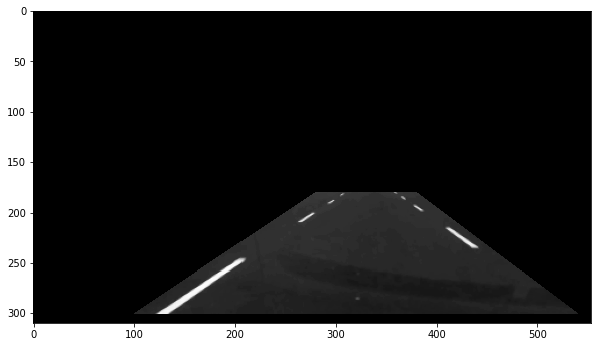

In [9]:
trans_img = cv2.bitwise_and(img[:,:,0], img[:,:,0], mask=stencil)#mask 부분만 살림
plt.figure(figsize=(10,10))
plt.imshow(trans_img, cmap= "gray")
plt.show()

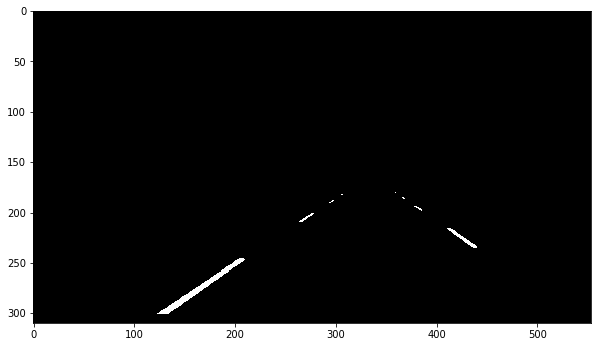

In [10]:
ret, thresh = cv2.threshold(trans_img, 130, 145, cv2.THRESH_BINARY) 

# plot image
plt.figure(figsize=(10,10))
plt.imshow(thresh, cmap= "gray")
plt.show()

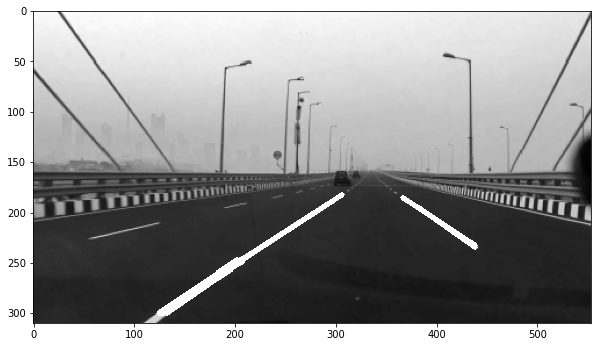

In [11]:
lines = cv2.HoughLinesP(thresh, 1, np.pi/180, 30, maxLineGap=200)
dummy = img[:,:,0].copy()

for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(dummy, (x1,y1),(x2,y2), (255,0,0), 3)

plt.figure(figsize=(10,10))
plt.imshow(dummy, cmap= "gray")
plt.show()    